###  Developing stocks  trading strategies based on technical analysis- Part 2
In continuation to developing stock trading strategies, I will develop Relative Strength Index startegy using python and explore major stocks and etfs to see if profitable trading models can be developed using Bollinger Band Strategy.



###  Relative Strength Index (RSI)
[Relative Strength Index](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI) measures the momentum and is a oscillator which moves between 0 and 100. Generally, when the RSI drops below 30, it indicates the market is oversold and when it goes above 70 it indicates overbought level. When a stock is oversold traders make an entry long positon (buy the stock)  and exit the long position ( sell the stock ). RSI calcuation is done in two steps. In [Step1](https://www.investopedia.com/terms/r/rsi.asp#:~:text=The%20relative%20strength%20index%20(RSI)%20is%20a%20momentum%20indicator%20used,scale%20of%20zero%20to%20100.), average gain or average loss is calculated. For a predetermined period (Generally 14 days), the days with gain only are used for calculation for average gain and days with losses only are used for calculating average loss.

[Step1 Calculation](https://www.investopedia.com/terms/r/rsi.asp#:~:text=The%20relative%20strength%20index%20(RSI)%20is%20a%20momentum%20indicator%20used,scale%20of%20zero%20to%20100.)
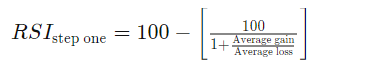

After the initial 14 days RSI is calculated as in step 1, later periods RSI is calculated in Step 2

[Step 2 Calculation](https://www.investopedia.com/terms/r/rsi.asp#:~:text=The%20relative%20strength%20index%20(RSI)%20is%20a%20momentum%20indicator%20used,scale%20of%20zero%20to%20100.)
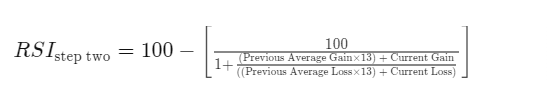

The threshold limits for RSI and calculation period can be modified as needed.


## Installing Libraries

In [1]:
%%capture
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install seaborn
!pip install numpy
%%capture
## https://github.com/Worlddatascience/DataScienceCohort/blob/master/6_How_to_Create_a_Candlestick_Chart_using_Python.ipynb
!pip install cufflinks
## Code to Install Backtrader
!pip install backtrader
#%%capture
! pip install pandas-ta
! pip install -U kaleido
%%capture
! pip install openpyxl

## Importing necessary packages

In [2]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import cufflinks as cf   #A powerful data visualization library used for Financial Data Science processes
from plotly.offline import iplot, init_notebook_mode #Plotly and cufflinks work in conjunction
cf.go_offline() #gives ability to plot offline
init_notebook_mode() #gives ability to plot things proportionately in the notebook
import pandas_ta as ta
import warnings
warnings.filterwarnings('ignore')
import kaleido
import plotly.io as pio


 ###  Function for RSI
> 1.Yahoo finance api is used to obtain the data for stocks and etfs( exchange traded funds)

> 2.Main variables for bollinger band strategy are:
>> - Stock Symbol(name)\
>> - frequency of stock price collection (frequency)
>> - Starting Date (first)
>> - Endinng Date (last)
>> - No of periods for collecting data for RSI calculation (period) 
>> - Total investment values (investment_value)   
>> - RSI for buying (buyRSI)
>> - RSI for selling(sellRSI)

**The below function will show the total profit by the strategy and the profit if invested only one time, along with the chart with buy and sell points. It will also show the candle stick plot with RSI and volume**

In [3]:
## https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html?highlight=rsi#momentum-indicators
name = "QQQ"
#def stock(name,start,end):
def rsi_strategy(name="QQQ",frequency="1d",first="2019-11-4", last="2022-11-15",period=14,buyRSI=30,sellRSI=70,multiplier=1.7,investment_value = 100000):
    ticker = yfinance.Ticker(name)
    df1 = ticker.history(interval=frequency,start=first,end=last)
    df1['RSI']=ta.momentum.rsi(close=df1['Close'],window=period)
    df1.dropna()
    #return df
    #def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = -1
    #data=df['Close']
    #lower_bb=df['LowerBand']
    #upper_bb=df['UpperBand']
    
    for i in range(len(df1['RSI'])):
        if df1['RSI'][i-1] >buyRSI and df1['RSI'][i] <buyRSI :
            if signal != 1:
                buy_price.append(df1['Close'][i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif df1['RSI'][i-1] < sellRSI and df1['RSI'][i] > sellRSI:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(df1['Close'][i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
    df1['buy_price']=buy_price
    df1['sell_price']=sell_price
    df1['bb_signal']=bb_signal 
    
    position = []
    
    for i in range(len(df1['bb_signal'])):
        if df1['bb_signal'][i] > 1:
            position.append(1)
        else:
            position.append(0)
    
        
    for i in range(len(df1['Close'])):
        if df1['bb_signal'][i] == 1:
            position[i] = 1
        elif df1['bb_signal'][i] == -1:
            position[i] = 0
        else:
            position[i] = position[i-1]
    df1['position']=position
    df1['return']=df1['Close'].diff()
    bb_strategy_ret = []

    for i in range(len(df1['return'])):
        try:
            returns = df1['return'][i]*df1['position'][i]
            bb_strategy_ret.append(returns)
        except:
            pass
    df1['bb_returns']=bb_strategy_ret
    #profit_percentage = round((100*sum(df['buy_price'])-sum(df['sell_price']))/(sum(df['buy_price'])),2)
    #total_buy=np.mean((df1['buy_price']))
    #total_sell=np.mean((df1['sell_price']))
    buy=[item for item in df1['buy_price']  if str(item) != 'nan']
    sell=[item for item in df1['sell_price']  if str(item) != 'nan']
    if len(buy)==len(sell):
        #buy=list
        #buy=[item for item in df1['buy_price']  if str(item) != 'nan']
        total_buy=np.sum(buy)
        total_sell=np.sum(sell)
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
        #print('Profit percentage of the BB strategy : {}%'.format(profit_percentage))
    else:
        total_buy=np.sum(buy)
        total_sell=np.sum(sell)+df1['Close'][-1]
        buy_sell_diff=total_sell-total_buy
        profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    #print(total_buy,total_sell)
    #print(list(buy))
    #print(list(sell),df1['Close'][-1])
    #buy_sell_diff=total_sell-total_buy
    #profit_percentage=round((buy_sell_diff/total_buy)*100,2)
    print('Profit percentage of the RSI strategy : {}%'.format(profit_percentage))
    Profit_oneinvest=round(((df1['Close'][-1]-buy[0])/(buy[0])*100),2)
    print('Total profit by just investing one time in{}'.format(name),'is{}%'.format(Profit_oneinvest))
    plt.rcParams['figure.figsize'] = [12,12]
    plt.rc('font', size=14)
    ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
    ax1.plot(df1['Close'],color = 'orange', linewidth = 2.5)
    ax1.plot(df1.index,df1['buy_price'], marker = '^',color = 'green', label = 'BUY')
    ax1.plot(df1.index,df1['sell_price'], marker = 'v', color = 'red', label = 'SELL')
    ax1.set_title(name)
    ax2.plot(df1['RSI'], color = 'blue', linewidth = 2.5)
    ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
    ax2.set_title('RELATIVE STRENGTH INDEX')
    plt.show()
    plt.rc('font', size=14)
    #Candlestick= cf.QuantFig(df1, title=name, legend='top', name=name)
    #Candlestick.add_volume() 
    #Candlestick.add_rsi(periods=14, color='green') 
    #Candlestick.iplot()
    

### Testing RSI strategy  for uptrending market 
### QQQ
 - QQQ, which is a exchange traded fund and follows nasdaq 100 index is explored for analysis

    As we are aware that NASDAQ overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the RSI strategy : 6.0%
Total profit by just investing one time inQQQ is629.32%


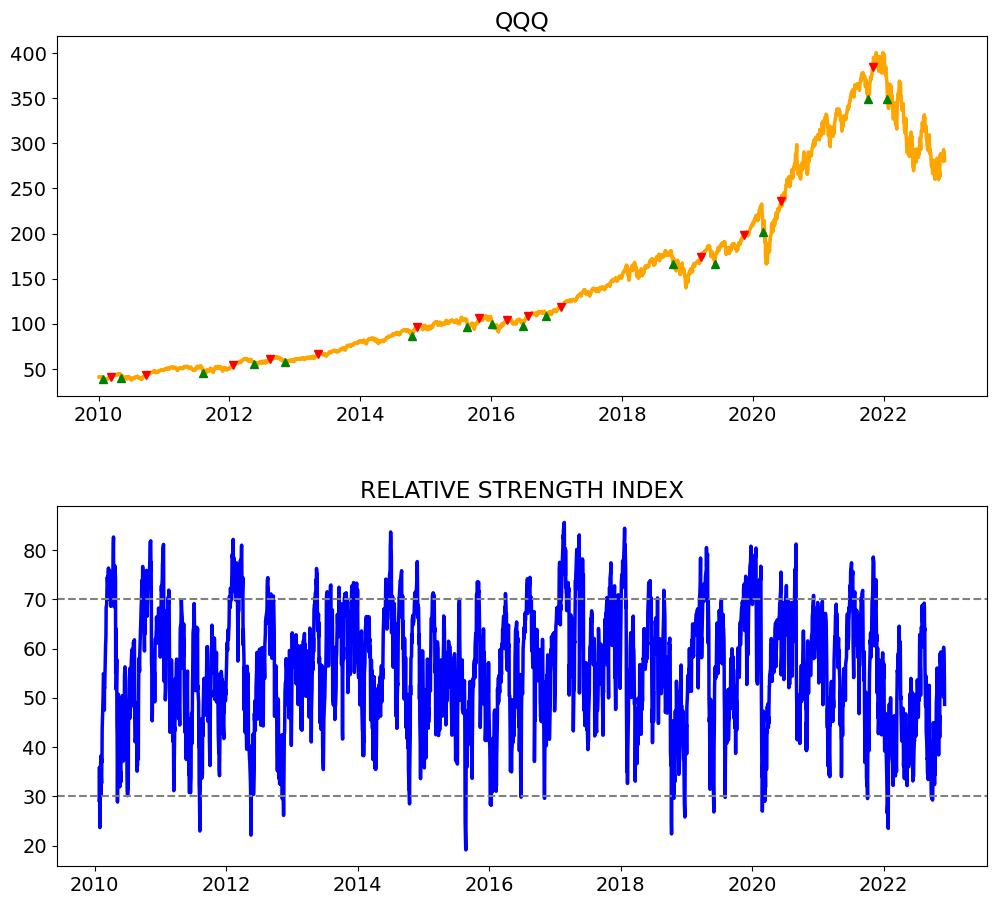

In [4]:
rsi_strategy("QQQ","1d","2010-01-4","2022-12-07",buyRSI=30,sellRSI=70,investment_value = 100000)

###  Testing RSI strategy  for down market
### QQQ
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF QQQ

Profit percentage of the RSI strategy : -1.43%
Total profit by just investing one time inQQQ is-15.44%


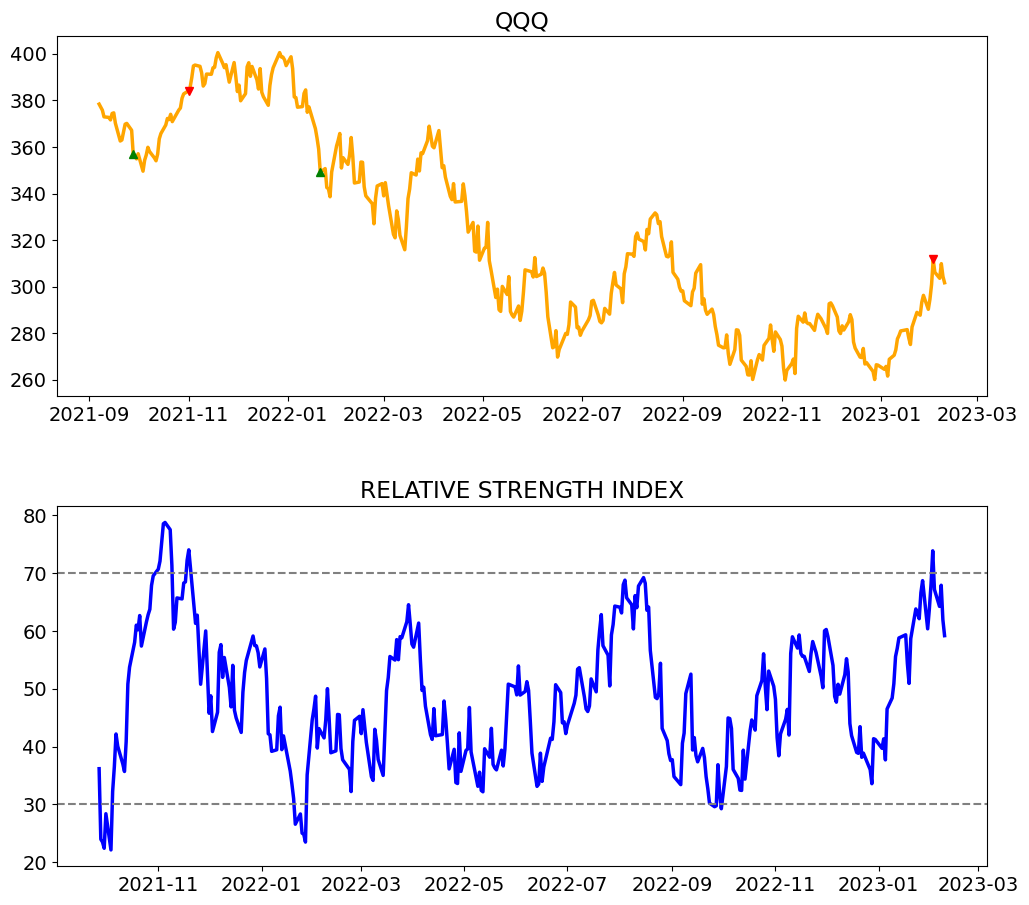

In [5]:

rsi_strategy("QQQ","1d","2021-09-4","2023-02-10",buyRSI=30,sellRSI=70,investment_value = 100000)

- #### It,s clear RSI strategy  gave better returns, when the market is trending down. 

### Testing RSI strategy for uptrending market 
### SPY
 - SPY, which is a exchange traded fund and follows S&P 500  index is explored for analysis

    As we are aware that S&P overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the RSI strategy : 5.58%
Total profit by just investing one time inSPY is359.5%


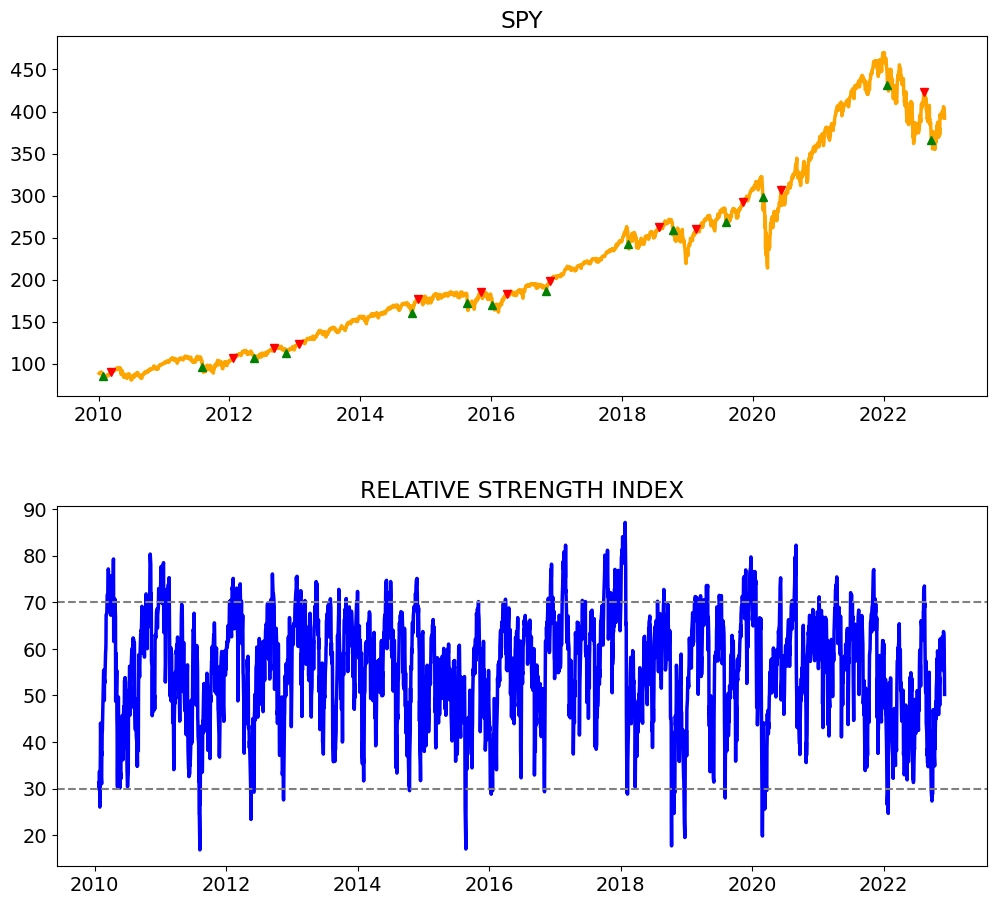

In [6]:

rsi_strategy("SPY","1d","2010-01-4","2022-12-07",investment_value = 100000)

###  Testing RSI strategy  for down market
### SPY
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF SPY

Profit percentage of the RSI strategy : 5.37%
Total profit by just investing one time inspy is-3.26%


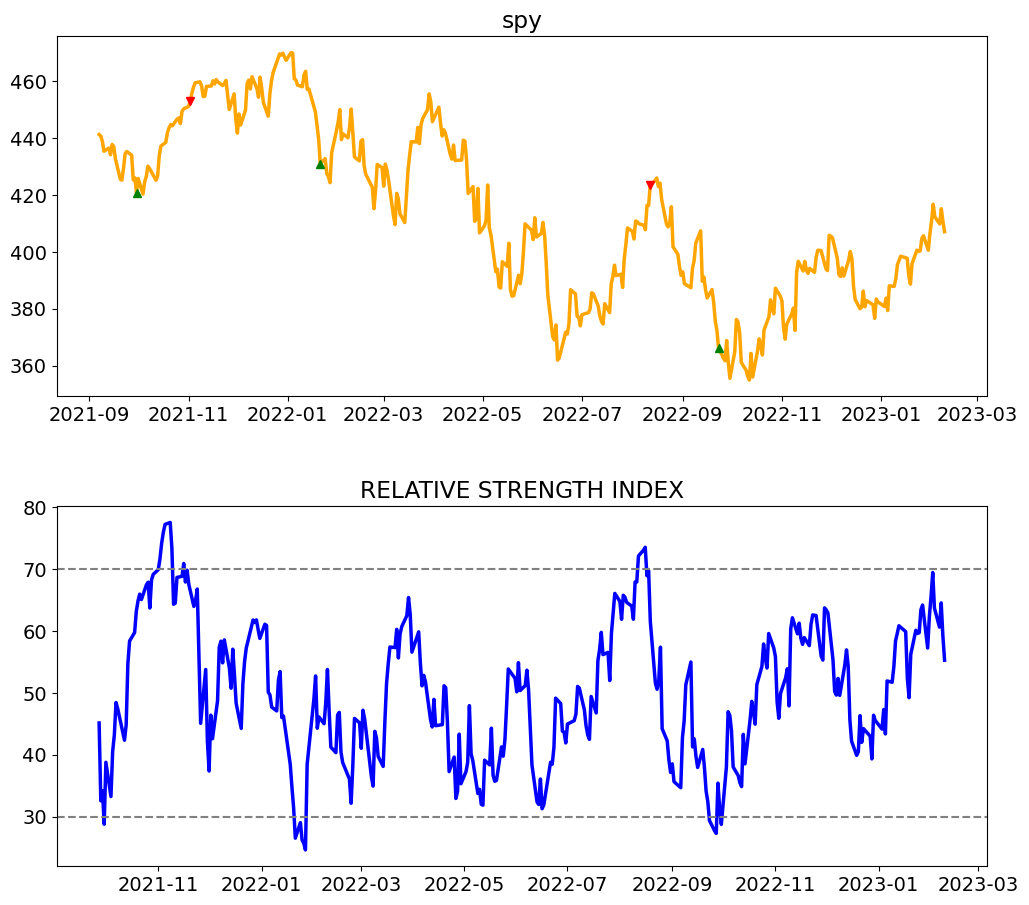

In [7]:

rsi_strategy("spy","1d","2021-09-4","2023-02-10",investment_value = 100000)

- #### It,s clear RSI strategy gave better returns even for SPY, when the market is trending down.

### Testing RSI strategy for uptrending market 
### DIA
 - DIA, which is a exchange traded fund and follows Dow Jonesindex is explored for analysis

    As we are aware that Dow Jones overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the RSI strategy : 6.92%
Total profit by just investing one time inDIA is343.76%


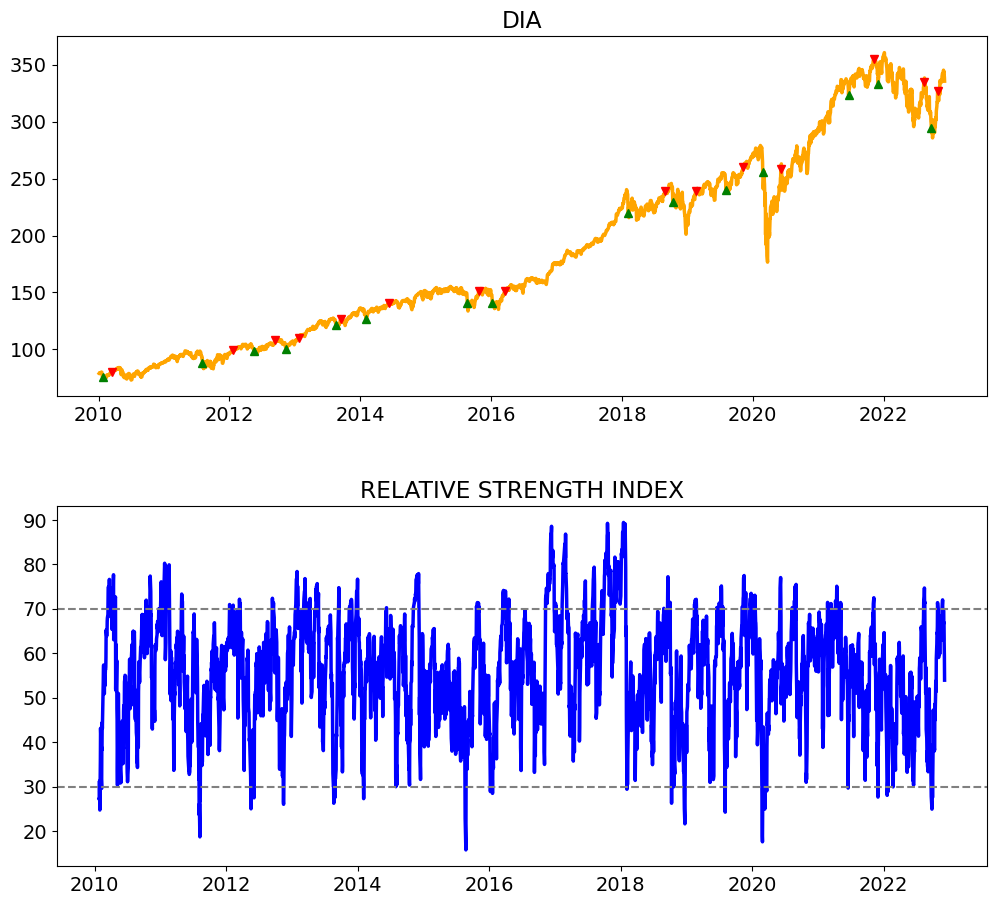

In [8]:
rsi_strategy("DIA","1d","2010-01-4","2022-12-07",investment_value = 100000)

###  Testing RSI strategy  for down market
### DIA
- 2022 has been bad year for stocks, and I have tested the bollinger band strategy for this period for ETF DIA

Profit percentage of the RSI strategy : 5.43%
Total profit by just investing one time inDIA is1.22%


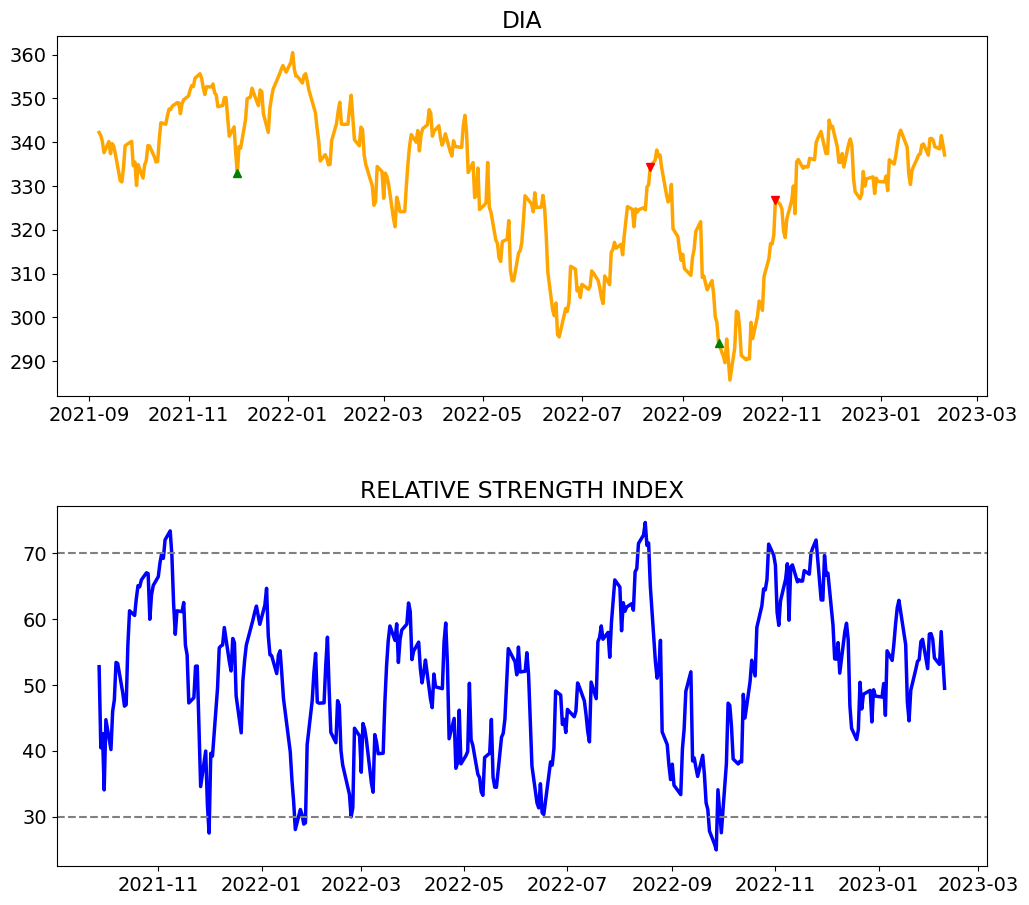

In [9]:
rsi_strategy("DIA","1d","2021-09-4","2023-02-10",investment_value = 100000)

- #### It,s clear RSI strategy gave better returns for DIA also, when the market is trending down mainly due to the fact that it is based on mean reversion

### Testing RSI strategy for non-trending market
### VYM
 - VYM, which is a high dividend yield xchange traded fund and has remained more or less steady over the period of last one year is evaluated to see if outperforms buy and hold strategy

    As we are aware that Dow Jones overall is in uptrend for last decade, first I will test using long term trend.


Profit percentage of the RSI strategy : 8.9%
Total profit by just investing one time inVYM is4.69%


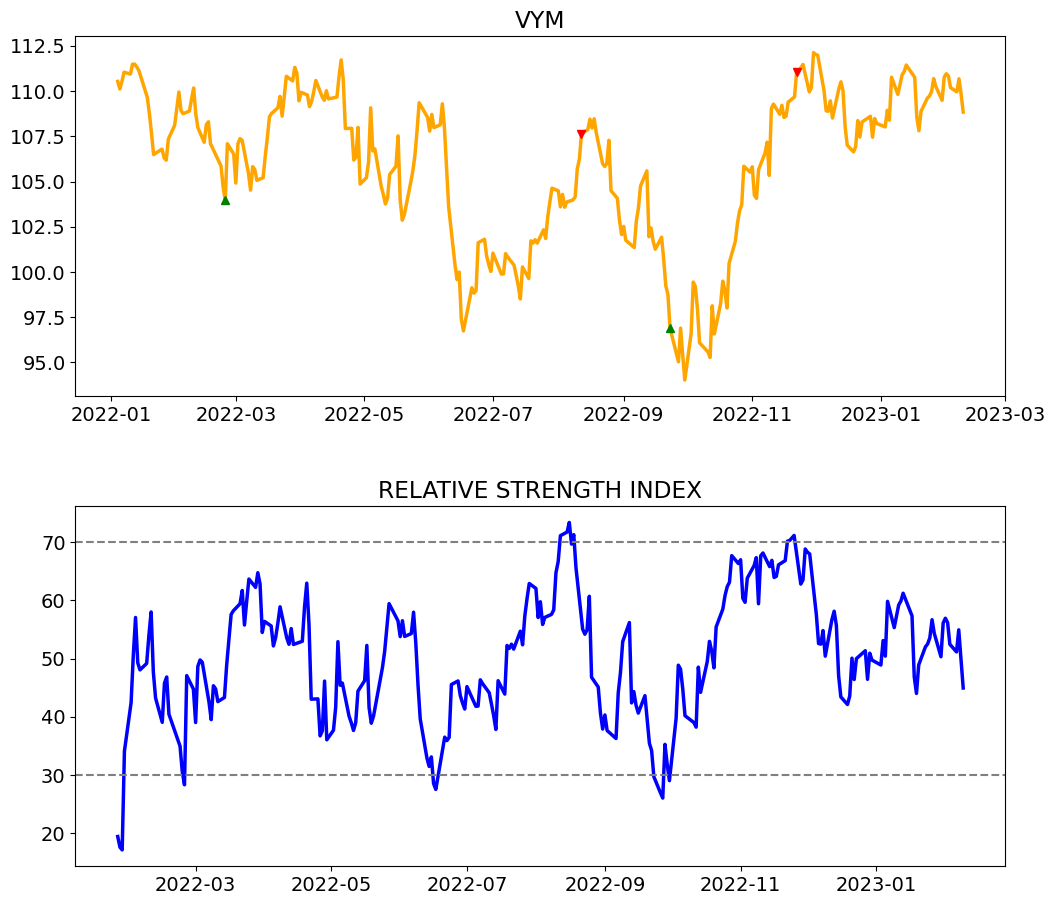

In [10]:
rsi_strategy("VYM","1d","2022-01-4","2023-02-10",investment_value = 100000)

### Summary 

- Similar to Bollinger Band Strategy, RSI strategy performs poorly in an uptrending market
- It performs better compared to buy and hold strategy in non-trending and down-trending market
- Overall, it performed better than Bollinger Band Strategy in all markets

### Further Work
- RSI strategy is generally used by traders for getting signals for making buy and sell decisions. The stategy can be modified using different period for calculating RSI , along with modifying the upper and lower limit of relative strenghth threshold. It can be used along with other indicators like Bollinger Band, Economic conditions, inflation data and treasury yield to take better trading decisions.